In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

# Importing the Data

In [2]:
covid_df = pd.read_csv('datasets_549966_1364659_nation_level_daily.csv')

In [3]:
covid_df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
169,17 July,34820,1040462,17476,654079,676,26287
170,18 July,37411,1077873,23583,677662,543,26830
171,19 July,40235,1118108,22730,700392,675,27505
172,20 July,36806,1154914,24303,724695,596,28101
173,21 July,39172,1194086,27589,752284,671,28772


We need to convert the date format into standard one

In [4]:
covid_df.Date

0       30 January 
1       31 January 
2      01 February 
3      02 February 
4      03 February 
           ...     
169        17 July 
170        18 July 
171        19 July 
172        20 July 
173        21 July 
Name: Date, Length: 174, dtype: object

In [5]:
covid_df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
169,17 July,34820,1040462,17476,654079,676,26287
170,18 July,37411,1077873,23583,677662,543,26830
171,19 July,40235,1118108,22730,700392,675,27505
172,20 July,36806,1154914,24303,724695,596,28101


In [6]:
covid_df['Date'] = '2019 ' + covid_df['Date'].astype('str')

In [7]:
covid_df['Date'] = covid_df['Date'].str.replace("January","01")
covid_df['Date'] = covid_df['Date'].str.replace("February","02")
covid_df['Date'] = covid_df['Date'].str.replace("March","03")
covid_df['Date'] = covid_df['Date'].str.replace("April","04")
covid_df['Date'] = covid_df['Date'].str.replace("May","05")
covid_df['Date'] = covid_df['Date'].str.replace("June","06")
covid_df['Date'] = covid_df['Date'].str.replace("July","07")

In [8]:
covid_df['Date'] = covid_df['Date'].apply(lambda x : x.split(" ")[0] +"-"+ x.split(" ")[2] + "-" + x.split(" ")[1])

In [9]:
covid_df.Date

0      2019-01-30
1      2019-01-31
2      2019-02-01
3      2019-02-02
4      2019-02-03
          ...    
169    2019-07-17
170    2019-07-18
171    2019-07-19
172    2019-07-20
173    2019-07-21
Name: Date, Length: 174, dtype: object

So now we have converted the date into standard date time format!

# Applying Prophet!

In [10]:
prophet_covid_df1 = covid_df[['Date','Daily Confirmed']]

In [11]:
prophet_covid_df2 = covid_df[['Date','Daily Recovered']]

In [12]:
prophet_covid_df1.tail()

,Date,Daily Confirmed
169,2019-07-17,34820
170,2019-07-18,37411
171,2019-07-19,40235
172,2019-07-20,36806
173,2019-07-21,39172


In [13]:
prophet_covid_df1 = prophet_covid_df1.rename(columns={'Date':'ds','Daily Confirmed' : 'y'})

In [14]:
prophet_covid_df1.tail()

,ds,y
169,2019-07-17,34820
170,2019-07-18,37411
171,2019-07-19,40235
172,2019-07-20,36806
173,2019-07-21,39172


In [15]:
prophet_covid_df1 = prophet_covid_df1.drop([30]) #30th row gave a parse error

In [16]:
pr = Prophet()

In [17]:
pr.fit(prophet_covid_df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = pr.make_future_dataframe(periods = 153)

In [19]:
forecast = pr.predict(future)

In [26]:
forecast[forecast['ds']=='2019-07-25']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
176,2019-07-25,38956.289307,38097.333032,40425.829921,38908.803864,38993.405465,305.826435,305.826435,305.826435,305.826435,305.826435,305.826435,0.0,0.0,0.0,39262.115741


# Lets visualize the forecast!

Text(41.125, 0.5, 'Confirmed COVID cases')

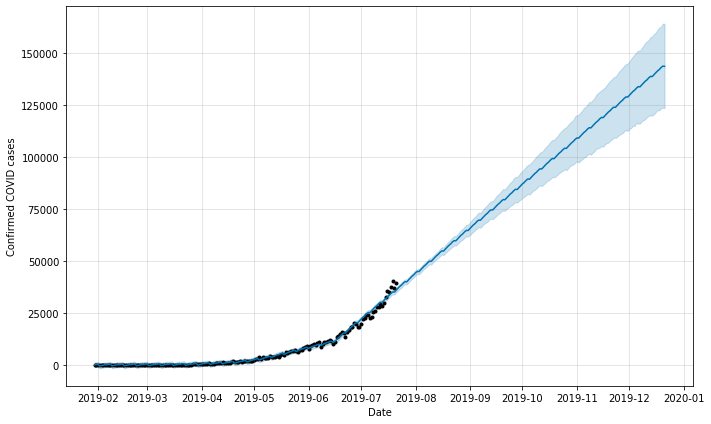

In [28]:
figure = pr.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Confirmed COVID cases')

# Great!!

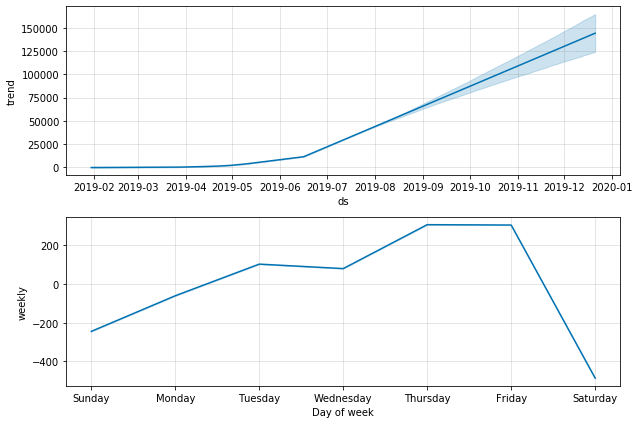

In [25]:
figure = pr.plot_components(forecast)